In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
vc = pd.read_csv('all_vc_comments.csv')

In [14]:
ind = ''
with open('output.txt', 'r') as f:
    for line in f:
        ind += f.readline()

ind = ind.replace('[', ', ')
ind = ind.replace('][', ', ')
ind = ind.replace(']\n','')
ind = ind.replace(']', ', ')

lst = [0] * len(vc)
for i in set(ind.split(', ')):
    try:
        lst[int(i)] = 1
    except:
        print(i)
        
vc['fintech_text'] = lst


64281
73717
57120
99412
83472
85237
71004
48840
49651
49194
100025
88304
54977
66099
64268
100600
93261
99676
70134
100791
100012
97767
50360
85614
78505
80515
79910
99994
48192
74887
51459
70080
64011
57784
51006
96233
83074
53576
85734
84796
104781
66487
105789
96590
78806
100859
90144
49377
78573
98845
74735
61239
106945
48252
106498
82641
104905
51951
78248
52050
68033
67279
103611
62362
90931
69621
56792
70734
94517
70887
59750
74790
67697
107341
72851
63899
71111
50304
91778
75147
70180
56663
53831
98076
53914
61042
100677
53504
100559
107753
68733
50011
57212
90040
76617
107188
86356
57543
48970
75110
99942
55089
49923
51178
73866
49549
49772
86285
97155
80898
78191
99488
105979
48834
56947
55217
93577
83532
84512
70970
78681
68487
96263
49318
55161
51023
48240
70107
101537
57022
95014
59829
83499
71320
57426
90331
52912
89526
74242
60080
90330
68253
76607
67712
54024
77291
86779
58245
103081
76650
90597
95460
59864
49953
82952
48735
72559
93899
84446
56741
74186
76129
50333
67

In [4]:
vc.dropna(inplace=True)

In [25]:
def lencom(x):
    return len(x.split('~#')) - 1

In [26]:
vc['commcount'] = vc['comments'].apply(lencom)

In [16]:
def getdate(date):
    a = date.split('-')
    if a[0] == 'в':
        return 2020 * 100 + int(a[1])
    elif len(a[0]) > 4:
        return 202000 + 3
    return int(a[0]) * 100 + int(a[1])

In [17]:
vc['date_for_sort'] = vc['date'].apply(getdate)

In [18]:
def realdate(date):
    return str(date // 100) + '-' + str(date % 100)

In [19]:
vc['date'] = vc['date_for_sort'].apply(realdate)

In [20]:
vc.sort_values(by=['date_for_sort'], inplace=True)

In [31]:
vc.drop([1185, 1184, 1183, 1182, 1186], inplace=True)

In [55]:
def avg(x):
    if len(x) != 0:
        return sum(map(float,x))/len(x)
    return 'NaN'

In [54]:
vc['comments_tone'] = vc['comments_tone'].str.split()

In [68]:
vc['comments_avg'] = vc[vc['comments_tone'].notna()]['comments_tone'].apply(avg)

In [72]:
all_avg = [sum(vc[(vc['comments_tone'].notna()) & (vc['date'] == date)]['comments_avg'])
           /len(vc[(vc['comments_tone'].notna()) & (vc['date'] == date)]) for date in vc['date'].unique()]

In [77]:
fin_avg = [sum(vc[(vc['comments_tone'].notna()) & (vc['date'] == date) & (vc['fintech_text'] == 1)]['comments_avg'])
           /(len(vc[(vc['comments_tone'].notna()) & (vc['date'] == date) & (vc['fintech_text'] == 1)]) + 0.000000001) for date in vc['date'].unique()]

In [78]:
fin_avg

[0.0,
 0.0,
 0.12832631566114738,
 0.31504242756454104,
 0.2067363234020179,
 0.1909548418043366,
 0.14318382140459265,
 0.1547477849465667,
 0.2672292656240972,
 0.18135736126835073,
 0.2696184877890465,
 0.24570573826614442,
 0.23798160231874682,
 0.1993518850466792,
 0.16897803359161875,
 0.2136073824754036,
 0.1461446056644564,
 0.18845190004618315,
 0.1952279964673302,
 0.19165133360953132,
 0.19335967220538805,
 0.2203903970234718,
 0.14627603175138343,
 0.22069942848033655,
 0.0,
 0.18690599164543167,
 0.19743428351180553,
 0.176070348836384,
 0.26086490276432855,
 0.20366717345458393,
 0.1659657817705243,
 0.15266634197672302,
 0.17507192053534473,
 0.20373658035404343,
 0.26398368905727587,
 0.2646573830903454,
 0.16887092648349453,
 0.1541246377933948,
 0.1779245799528783,
 0.21480033983428432,
 0.17003431683469675,
 0.07136469050697836,
 0.21214552220973096,
 0.21546411546345376,
 0.19852936012657194,
 0.2491956015042163,
 0.18902211413463377,
 0.19677350811074823,
 0.163500

([<matplotlib.axis.XTick at 0x1ec81a56688>,
 <a list of 7 Text xticklabel objects>)

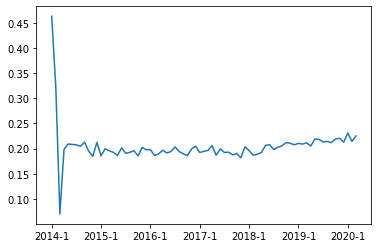

In [80]:
plt.plot(vc['date'].unique(), all_avg)
plt.xticks(ticks=range(0,74,12))